In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [2]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_16_data_4.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_16_data_4.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

read_x_data
read_y_data
[[-0.97820564  0.29297193 -0.07061703 -0.96544182  0.2754832  -0.07559271
  -0.95055615  0.26713403 -0.06478687 -0.94939434  0.28851273 -0.05467842
  -1.02291172  0.31880814 -0.06668594 -1.02036267  0.29820167 -0.09116619
  -0.98972578  0.26476729 -0.09036746 -0.9837491   0.30531915 -0.07307987
  -1.06898421  0.34968716 -0.03087716 -1.12097493  0.35989869 -0.06120685
  -1.15727766  0.31518646 -0.15790448 -1.05000599  0.3741363  -0.18206539
  -0.59768246  0.20031284 -0.03087716 -0.54569173  0.19010131 -0.06120685
  -0.50938901  0.23481354 -0.15790448 -0.61666068  0.1758637  -0.18206539]
 [-0.96599853  0.27606791 -0.07565659 -0.95086392  0.26695474 -0.06533805
  -0.94930712  0.28749528 -0.05464469 -0.94653851  0.31281185 -0.06572685
  -1.02090166  0.29927989 -0.09043877 -0.99077126  0.26520123 -0.09134644
  -0.98375094  0.30325434 -0.07242409 -0.95978485  0.33228947 -0.10427239
  -1.11885836  0.35967639 -0.059538   -1.15987075  0.32063895 -0.15402077
  -1.05699218

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

(3072, 48) (3072, 7) training data size
(1024, 48) (1024, 7) Validation data size


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm


input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 200, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 200, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()


Model: "Rectangular_4by4_sensor_concept_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48)]              0         
_________________________________________________________________
dense (Dense)                (None, 200)               9800      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 1407      
Total params: 51,407
Trainable params: 51,407
Non-trainable params: 0
_________________________________________________________________


In [5]:
history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))
#history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=1, callbacks=my_callbacks, validation_data=(xval_scale,yval_scale))


Epoch 1/20
96/96 - 0s - loss: 0.2576 - val_loss: 0.2262
Epoch 2/20
96/96 - 0s - loss: 0.2098 - val_loss: 0.2044
Epoch 3/20
96/96 - 0s - loss: 0.1932 - val_loss: 0.1917
Epoch 4/20
96/96 - 0s - loss: 0.1788 - val_loss: 0.1766
Epoch 5/20
96/96 - 0s - loss: 0.1677 - val_loss: 0.1640
Epoch 6/20
96/96 - 0s - loss: 0.1624 - val_loss: 0.1651
Epoch 7/20
96/96 - 0s - loss: 0.1538 - val_loss: 0.1623
Epoch 8/20
96/96 - 0s - loss: 0.1516 - val_loss: 0.1523
Epoch 9/20
96/96 - 0s - loss: 0.1469 - val_loss: 0.1578
Epoch 10/20
96/96 - 0s - loss: 0.1408 - val_loss: 0.1534
Epoch 11/20
96/96 - 0s - loss: 0.1377 - val_loss: 0.1569
Epoch 12/20
96/96 - 0s - loss: 0.1350 - val_loss: 0.1409
Epoch 13/20
96/96 - 0s - loss: 0.1313 - val_loss: 0.1391
Epoch 14/20
96/96 - 0s - loss: 0.1279 - val_loss: 0.1393
Epoch 15/20
96/96 - 0s - loss: 0.1247 - val_loss: 0.1458
Epoch 16/20
96/96 - 0s - loss: 0.1239 - val_loss: 0.1335
Epoch 17/20
96/96 - 0s - loss: 0.1214 - val_loss: 0.1276
Epoch 18/20
96/96 - 0s - loss: 0.1191 - 

In [6]:
#to evaluate on training data
#scores=model.evaluate(xtrain_scale,y_train_scale,verbose=0)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#model.save("model.h5")
#print("saved the model to disk")
#to load model
#model=load_model('model.h5')

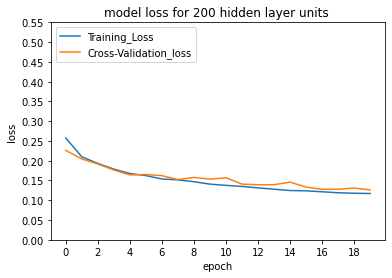

In [7]:
import keras
from matplotlib import pyplot as plt
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss for 200 hidden layer units ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss ', 'Cross-Validation_loss'], loc='upper left')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 19, 2))
plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('performance_for_200_hiddenunits_4p.png', dpi=1200)
plt.show()


In [8]:
###for 500 hidden layer units
input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 500, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 500, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")




In [9]:
history_2 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))

Epoch 1/20
96/96 - 0s - loss: 0.2505 - val_loss: 0.2104
Epoch 2/20
96/96 - 0s - loss: 0.2001 - val_loss: 0.1879
Epoch 3/20
96/96 - 0s - loss: 0.1806 - val_loss: 0.1715
Epoch 4/20
96/96 - 0s - loss: 0.1657 - val_loss: 0.1591
Epoch 5/20
96/96 - 0s - loss: 0.1544 - val_loss: 0.1476
Epoch 6/20
96/96 - 0s - loss: 0.1507 - val_loss: 0.1452
Epoch 7/20
96/96 - 0s - loss: 0.1475 - val_loss: 0.1407
Epoch 8/20
96/96 - 0s - loss: 0.1410 - val_loss: 0.1350
Epoch 9/20
96/96 - 0s - loss: 0.1345 - val_loss: 0.1324
Epoch 10/20
96/96 - 0s - loss: 0.1303 - val_loss: 0.1322
Epoch 11/20
96/96 - 0s - loss: 0.1278 - val_loss: 0.1315
Epoch 12/20
96/96 - 0s - loss: 0.1252 - val_loss: 0.1311
Epoch 13/20
96/96 - 0s - loss: 0.1208 - val_loss: 0.1208
Epoch 14/20
96/96 - 0s - loss: 0.1196 - val_loss: 0.1217
Epoch 15/20
96/96 - 0s - loss: 0.1154 - val_loss: 0.1247
Epoch 16/20
96/96 - 0s - loss: 0.1150 - val_loss: 0.1188
Epoch 17/20
96/96 - 0s - loss: 0.1108 - val_loss: 0.1142
Epoch 18/20
96/96 - 0s - loss: 0.1102 - 

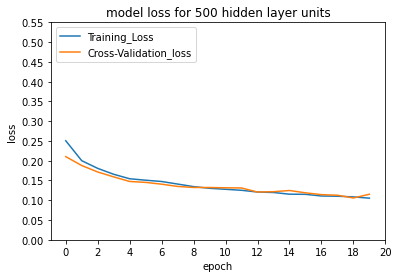

In [10]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss for 500 hidden layer units')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss ', 'Cross-Validation_loss'], loc='upper left')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('performance_for_500_hiddenunits_4p.png', dpi=1200)
plt.show()

In [11]:
###for 700 hidden units
input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")



In [12]:
history_3 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))

Epoch 1/20
96/96 - 1s - loss: 0.2491 - val_loss: 0.2111
Epoch 2/20
96/96 - 0s - loss: 0.1973 - val_loss: 0.1876
Epoch 3/20
96/96 - 0s - loss: 0.1746 - val_loss: 0.1682
Epoch 4/20
96/96 - 0s - loss: 0.1599 - val_loss: 0.1564
Epoch 5/20
96/96 - 0s - loss: 0.1532 - val_loss: 0.1528
Epoch 6/20
96/96 - 0s - loss: 0.1473 - val_loss: 0.1577
Epoch 7/20
96/96 - 0s - loss: 0.1399 - val_loss: 0.1371
Epoch 8/20
96/96 - 0s - loss: 0.1348 - val_loss: 0.1328
Epoch 9/20
96/96 - 0s - loss: 0.1309 - val_loss: 0.1315
Epoch 10/20
96/96 - 0s - loss: 0.1265 - val_loss: 0.1230
Epoch 11/20
96/96 - 0s - loss: 0.1217 - val_loss: 0.1234
Epoch 12/20
96/96 - 0s - loss: 0.1188 - val_loss: 0.1167
Epoch 13/20
96/96 - 0s - loss: 0.1153 - val_loss: 0.1172
Epoch 14/20
96/96 - 0s - loss: 0.1138 - val_loss: 0.1299
Epoch 15/20
96/96 - 0s - loss: 0.1080 - val_loss: 0.1143
Epoch 16/20
96/96 - 0s - loss: 0.1057 - val_loss: 0.1113
Epoch 17/20
96/96 - 0s - loss: 0.1050 - val_loss: 0.1185
Epoch 18/20
96/96 - 0s - loss: 0.1032 - 

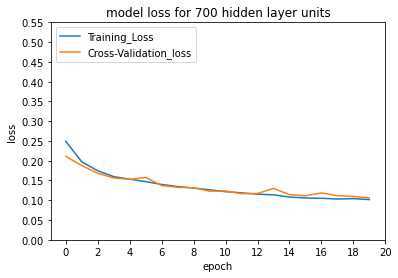

In [13]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss for 700 hidden layer units')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss ', 'Cross-Validation_loss'], loc='upper left')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('performance_for_700_hiddenunits_4p.png', dpi=1200)
plt.show()

In [14]:
###for 5 hidden layers
input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 3000, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 3000, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")


In [15]:
history_4 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))

Epoch 1/20
96/96 - 6s - loss: 0.2536 - val_loss: 0.2138
Epoch 2/20
96/96 - 6s - loss: 0.1969 - val_loss: 0.1811
Epoch 3/20
96/96 - 6s - loss: 0.1719 - val_loss: 0.1705
Epoch 4/20
96/96 - 6s - loss: 0.1583 - val_loss: 0.1644
Epoch 5/20
96/96 - 5s - loss: 0.1525 - val_loss: 0.1607
Epoch 6/20
96/96 - 6s - loss: 0.1444 - val_loss: 0.1394
Epoch 7/20
96/96 - 6s - loss: 0.1419 - val_loss: 0.1328
Epoch 8/20
96/96 - 6s - loss: 0.1334 - val_loss: 0.1351
Epoch 9/20
96/96 - 6s - loss: 0.1302 - val_loss: 0.1353
Epoch 10/20
96/96 - 6s - loss: 0.1279 - val_loss: 0.1301
Epoch 11/20
96/96 - 6s - loss: 0.1211 - val_loss: 0.1279
Epoch 12/20
96/96 - 6s - loss: 0.1189 - val_loss: 0.1241
Epoch 13/20
96/96 - 5s - loss: 0.1169 - val_loss: 0.1274
Epoch 14/20
96/96 - 5s - loss: 0.1152 - val_loss: 0.1154
Epoch 15/20
96/96 - 6s - loss: 0.1127 - val_loss: 0.1101
Epoch 16/20
96/96 - 6s - loss: 0.1117 - val_loss: 0.1084
Epoch 17/20
96/96 - 6s - loss: 0.1054 - val_loss: 0.1252
Epoch 18/20
96/96 - 6s - loss: 0.1043 - 

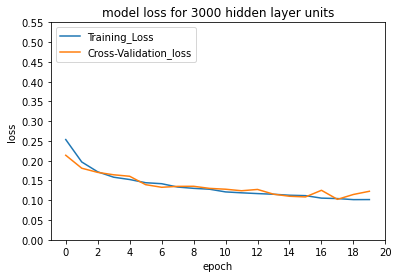

In [16]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss for 3000 hidden layer units')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss ', 'Cross-Validation_loss'], loc='upper left')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('performance_for_3000_hiddenunits_4p.png', dpi=1200)
plt.show()